#Datasets used :
   
# 1.   PIMA   :  diabetes.csv

***source***: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

***8 Attributes:***

Pregnancies,	Glucose,	BloodPressure,	SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction,	Age


note: predigree function is a function which scores likelihood of diabetes based on family history

***1 Target Variable:***

Outcome (Class/ Diabetes yes or no)

500 - 0

268 - 1


# 2.   Diabetes Dataset 2     : diabetes_data.csv

***source***:  https://www.kaggle.com/datasets/andrewmvd/early-diabetes-classification


***15 attributes:***

age	gender,	polyuria,	polydipsia,	sudden_weight_loss,	weakness,	polyphagia,	genital_thrush,	visual_blurring,	itching,	irritability,	delayed_healing,	partial_paresis,	muscle_stiffness,	alopecia,	obesity

polyuria: excessive urination

polydipsia: excessive thirst

polyphagia: excessive hunger

paresis: paralysis/ weak muscle moments

alopecia: positional hair loss


***1 Target Variable:***

Class

320 - 0

200 - 1


---


# Algorithms used:
1. Decision Tree
2. Random Forest
3. SVM
4. XGBOOST
5. ADABOOST

LIME AND SHAP



---


# All the 5 algorithms have been run on both the datasets.


---
---



# 1. Decision Tree using Pima Dataset

In [ ]:
# Importing All Libraries
import pandas
from google.colab import files
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the Dataset
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Preprocessing

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0]


Accuracy: 0.76
Depth of the Decision Tree: 3


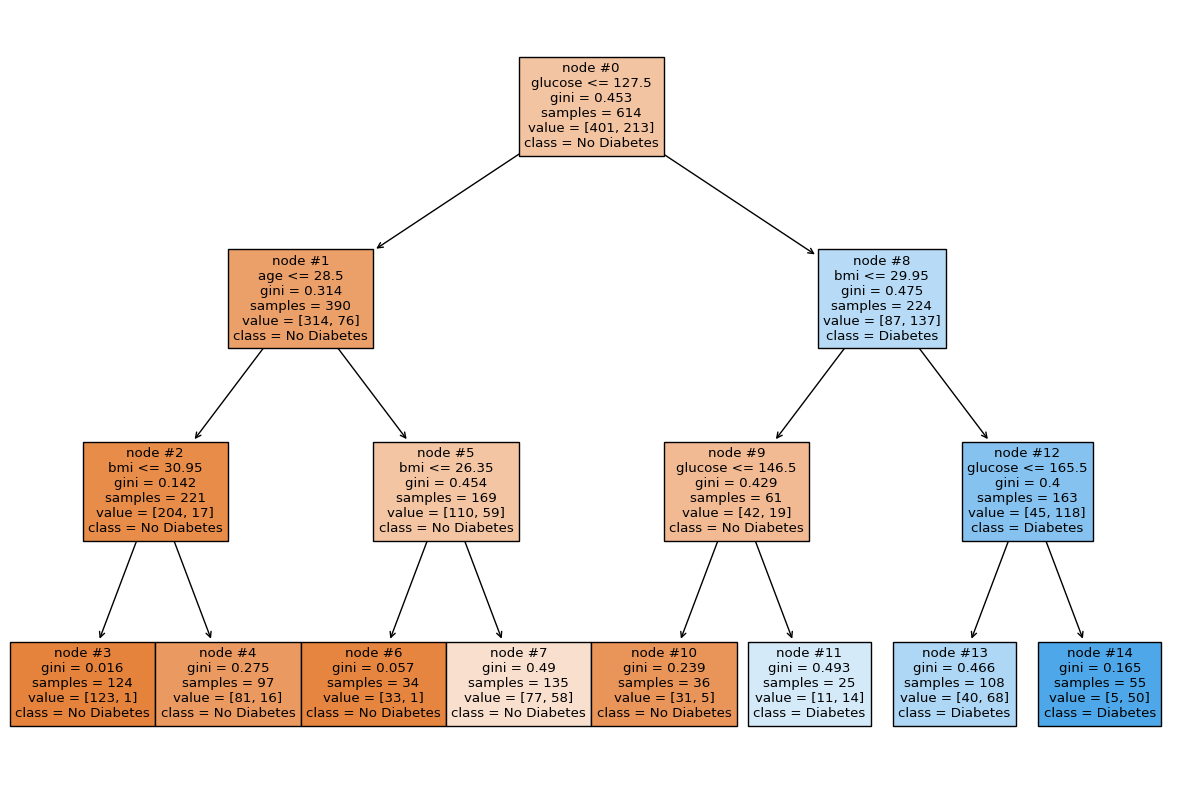

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

column_names = ["pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "diabetes_pedigree", "age", "outcome"]

# Separate features and target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]


# Create a decision tree classifier with pruning (max_depth parameter)
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjust max_depth as needed

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get the feature names (attributes)
feature_names = column_names[:-1]

# Get the depth of the decision tree
tree_depth = clf.get_depth()
print(f"Depth of the Decision Tree: {tree_depth}")

# Customize node labels to display attributes
class_names = ["No Diabetes", "Diabetes"]
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, node_ids=True)
plt.show()


# Evaluationary measures:

note:

accuracy=80%
This means our model is 80% accurate in classifying diabates.

precision=75%
This means that out of the cases predicted as diabetes present, 75% were actually diabetic.

recall=75%
This means that out of all the actual diabetes cases, our model correctly identified 75% of them.

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



# Confusion Matrix:

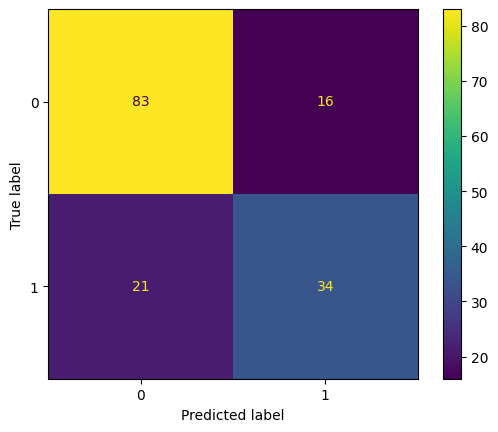

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=clf.classes_)
disp.plot()
# plt.show()

# Correlation HeatMap

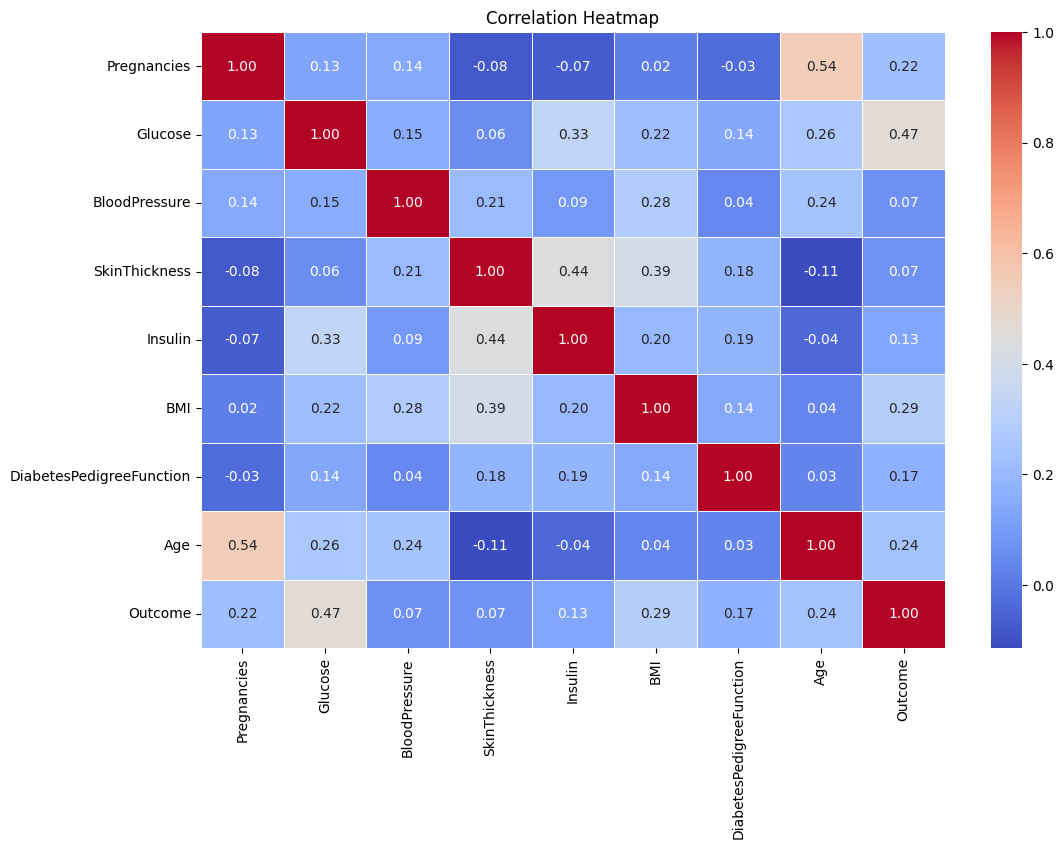

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Feature Importance Plot:

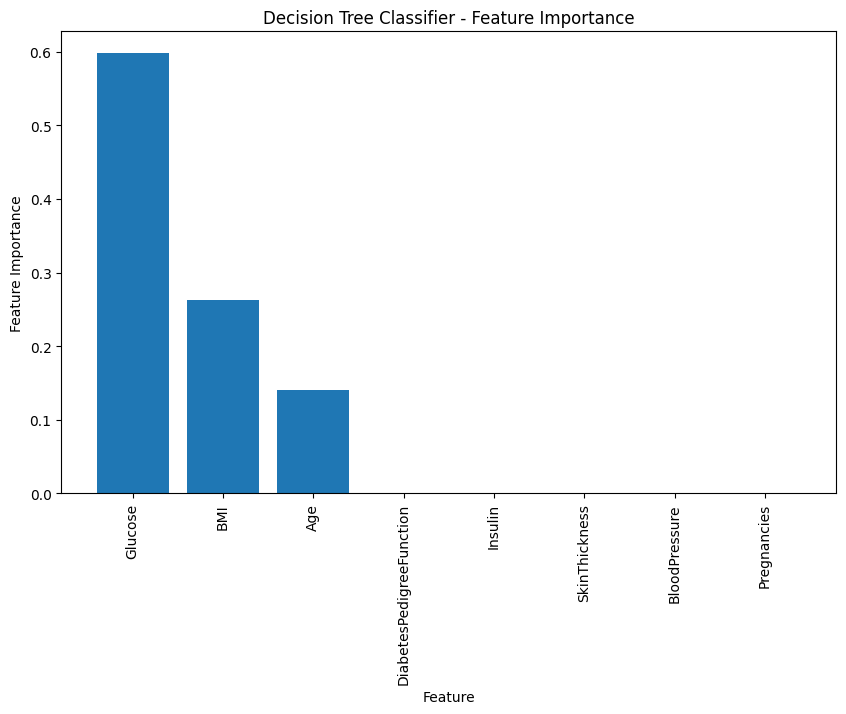

In [ ]:

import matplotlib.pyplot as plt

# Get feature importances from the trained classifier
feature_importances = clf.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort the features by importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Decision Tree Classifier - Feature Importance')
plt.show()

# Printing the Feature Importance values:

In [ ]:
from tabulate import tabulate

# Get the feature importances and their indices
feature_importances = clf.feature_importances_

# Sort features by importance
sorted_features = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Create a list of rows for the table
table_data = [[feature, f'{importance:.4f}'] for feature, importance in sorted_features]

# Add a header to the table
table_header = ['Feature', 'Importance']

# Print the table
print(tabulate(table_data, headers=table_header, tablefmt="grid"))


+--------------------------+--------------+
| Feature                  |   Importance |
+==========================+==============+
| Glucose                  |       0.5974 |
+--------------------------+--------------+
| BMI                      |       0.2622 |
+--------------------------+--------------+
| Age                      |       0.1405 |
+--------------------------+--------------+
| Pregnancies              |       0      |
+--------------------------+--------------+
| BloodPressure            |       0      |
+--------------------------+--------------+
| SkinThickness            |       0      |
+--------------------------+--------------+
| Insulin                  |       0      |
+--------------------------+--------------+
| DiabetesPedigreeFunction |       0      |
+--------------------------+--------------+


# ROC_AUC CURVE:

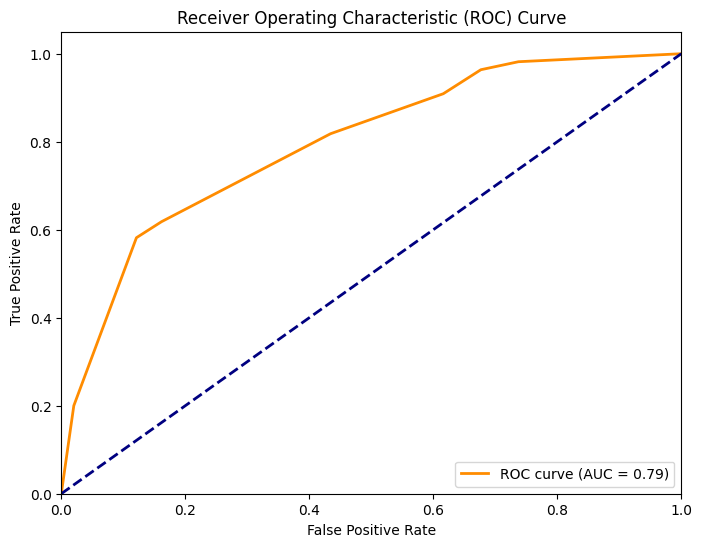

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Get predicted probabilities for the positive class
y_score = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# K-Fold Validation:

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
kf = KFold(n_splits=10, shuffle=True, random_state=42)


# Perform 10-fold cross-Validation and calculate accuracy scores
scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f'Fold {fold}: Accuracy = {score:.4f}')

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy:.4f}')

Fold 1: Accuracy = 0.7792
Fold 2: Accuracy = 0.7403
Fold 3: Accuracy = 0.6623
Fold 4: Accuracy = 0.8052
Fold 5: Accuracy = 0.8182
Fold 6: Accuracy = 0.6883
Fold 7: Accuracy = 0.8182
Fold 8: Accuracy = 0.7662
Fold 9: Accuracy = 0.6579
Fold 10: Accuracy = 0.8158
Mean Accuracy: 0.7552


# Query:

In [ ]:
random_input = np.array([[3,	78,	50,	32,	88,	31,	0.248	, 26]])

# Get the predicted class label
predicted_class = clf.predict(random_input)

if(predicted_class=='0'): print("absence of diabetes.\n")
else: print("presence of diabetes.\n")


presence of diabetes.



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
<ipython-input-24-1a262d32e164>:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if(predicted_class=='0'): print("absence of diabetes.\n")




---



---



# 2. Decision Tree using the other Diabetes Dataset

In [ ]:
pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.8 MB/s eta 0:00:00


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import category_encoders as ce

# loading dataset
data = pd.read_csv('diabetes_data.csv')
data.head()


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Data pre-processing

In [ ]:
# Check for missing values
print(data.isnull().sum())

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64


In [ ]:
# replacing category values by numerical values
data['gender'].replace({"Male":1,"Female":0},inplace=True)
# Separate features and target variable
# X = data.drop('class', axis=1)     # if we were to take all the features into consideration for training the model, except for the last class column

feature_cols= [
    'age', 'gender', 'polyuria', 'polydipsia', 'weakness', 'genital_thrush',
    'itching', 'irritability', 'delayed_healing', 'partial_paresis',
    'muscle_stiffness', 'alopecia', 'obesity'
]
all_features=[    'age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
    'itching', 'irritability', 'delayed_healing', 'partial_paresis',
    'muscle_stiffness', 'alopecia', 'obesity']

X = data[feature_cols] # Features that have highest importance
x= data[all_features]
y = data['class']

data.head()
# print(X)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Creating a classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(y_pred)

[0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1
 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0
 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0
 1 1 1 1 1 0 1 0]


Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94        54
           1       0.98      0.95      0.97       102

    accuracy                           0.96       156
   macro avg       0.95      0.96      0.95       156
weighted avg       0.96      0.96      0.96       156



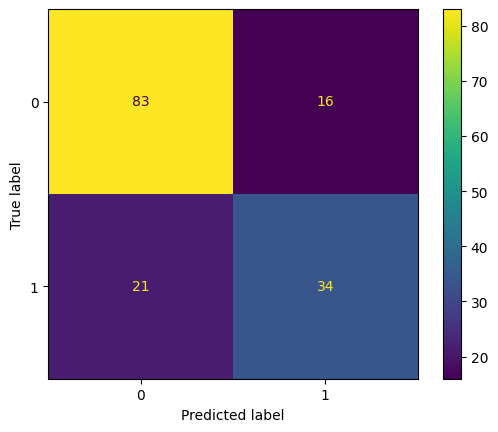

In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=clf.classes_)
disp.plot()
# plt.show()




# Correlation HeatMap

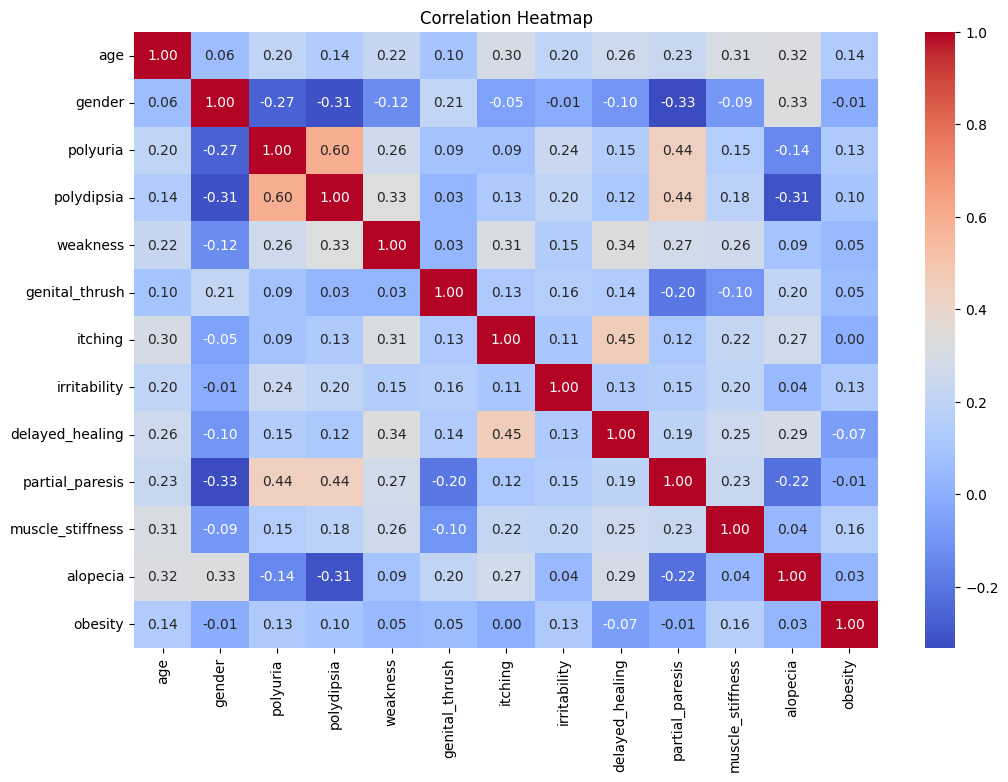

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Feature Importance Plot

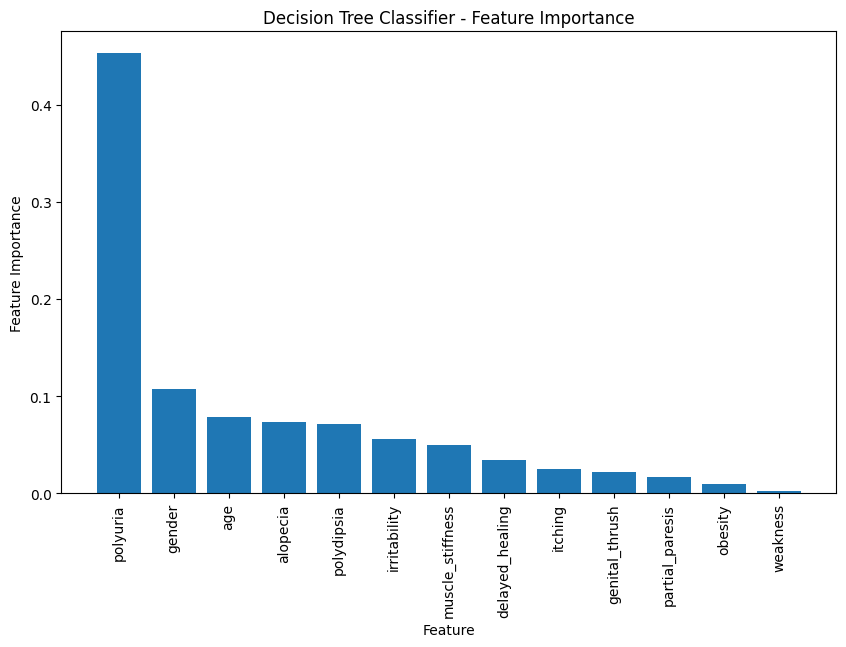

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained classifier
feature_importances = clf.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort the features by importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Decision Tree Classifier - Feature Importance')
plt.show()

# Printing the Feature Importance Values (of non-zero feature importance values)

In [ ]:
from tabulate import tabulate

# Get the feature importances and their indices
feature_importances = clf.feature_importances_

# Sort features by importance
sorted_features = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Create a list of rows for the table
table_data = [[feature, f'{importance:.4f}'] for feature, importance in sorted_features]

# Add a header to the table
table_header = ['Feature', 'Importance']

# Print the table
print(tabulate(table_data, headers=table_header, tablefmt="grid"))


+------------------+--------------+
| Feature          |   Importance |
+==================+==============+
| polyuria         |       0.4527 |
+------------------+--------------+
| gender           |       0.1073 |
+------------------+--------------+
| age              |       0.0786 |
+------------------+--------------+
| alopecia         |       0.0737 |
+------------------+--------------+
| polydipsia       |       0.071  |
+------------------+--------------+
| irritability     |       0.0555 |
+------------------+--------------+
| muscle_stiffness |       0.0503 |
+------------------+--------------+
| delayed_healing  |       0.0343 |
+------------------+--------------+
| itching          |       0.0252 |
+------------------+--------------+
| genital_thrush   |       0.0224 |
+------------------+--------------+
| partial_paresis  |       0.017  |
+------------------+--------------+
| obesity          |       0.0101 |
+------------------+--------------+
| weakness         |       0

# Feature importance of all features.... 3 attributes have 0 importance thus we removed them from our training.

In [ ]:
from tabulate import tabulate

# Get the feature importances and their indices
feature_importances = clf.feature_importances_

# Sort features by importance
sorted_features = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Create a list of rows for the table
table_data = [[feature, f'{importance:.4f}'] for feature, importance in sorted_features]

# Add a header to the table
table_header = ['Feature', 'Importance']

# Print the table
print(tabulate(table_data, headers=table_header, tablefmt="grid"))


+------------------+--------------+
| Feature          |   Importance |
+==================+==============+
| polyuria         |       0.4527 |
+------------------+--------------+
| gender           |       0.1073 |
+------------------+--------------+
| age              |       0.0786 |
+------------------+--------------+
| alopecia         |       0.0737 |
+------------------+--------------+
| polydipsia       |       0.071  |
+------------------+--------------+
| irritability     |       0.0555 |
+------------------+--------------+
| muscle_stiffness |       0.0503 |
+------------------+--------------+
| delayed_healing  |       0.0343 |
+------------------+--------------+
| itching          |       0.0252 |
+------------------+--------------+
| genital_thrush   |       0.0224 |
+------------------+--------------+
| partial_paresis  |       0.017  |
+------------------+--------------+
| obesity          |       0.0101 |
+------------------+--------------+
| weakness         |       0

# ROC-AUC CURVE

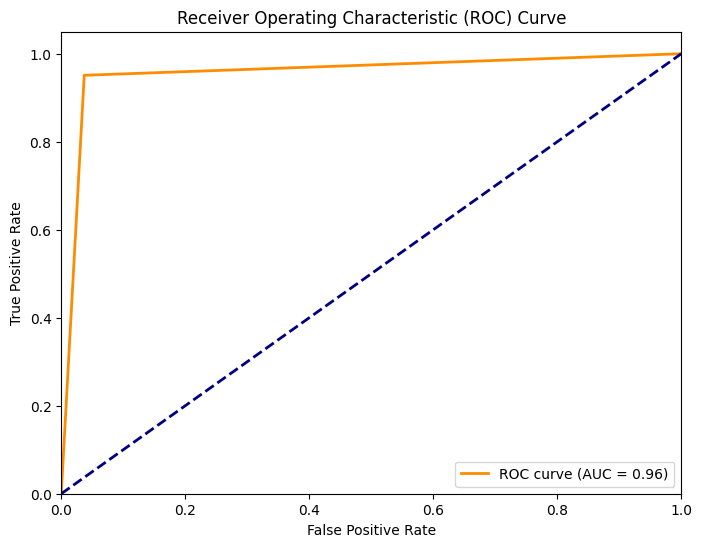

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Get predicted probabilities for the positive class
y_score = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# K-Fold Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
kf = KFold(n_splits=10, shuffle=True, random_state=42)


# Perform 5-fold cross-Validation and calculate accuracy scores
scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f'Fold {fold}: Accuracy = {score:.4f}')

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy:.4f}')

Fold 1: Accuracy = 0.9423
Fold 2: Accuracy = 0.9231
Fold 3: Accuracy = 0.9423
Fold 4: Accuracy = 0.9808
Fold 5: Accuracy = 0.9808
Fold 6: Accuracy = 0.9038
Fold 7: Accuracy = 0.9615
Fold 8: Accuracy = 0.9808
Fold 9: Accuracy = 0.9808
Fold 10: Accuracy = 1.0000
Mean Accuracy: 0.9596




---



---



# 3. Random Forest using Pima Dataset

In [ ]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('diabetes.csv')
print(df.head())


# Putting feature variable to X
X = df.drop('Outcome',axis=1)
# Putting response variable to y
y = df['Outcome']

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((537, 8), (231, 8))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)
%time
classifier_rf.fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# checking the oob score
classifier_rf.oob_score_

0.7597765363128491

In [ ]:
#Predicting the test set result
y_pred= classifier_rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

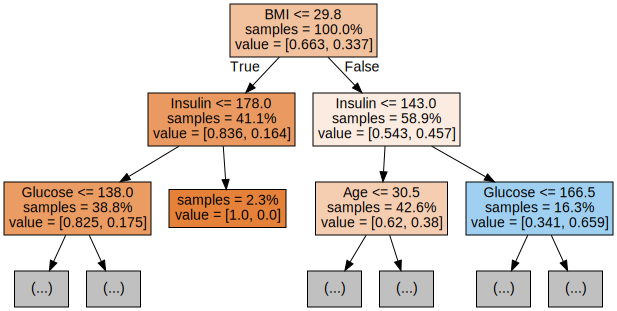

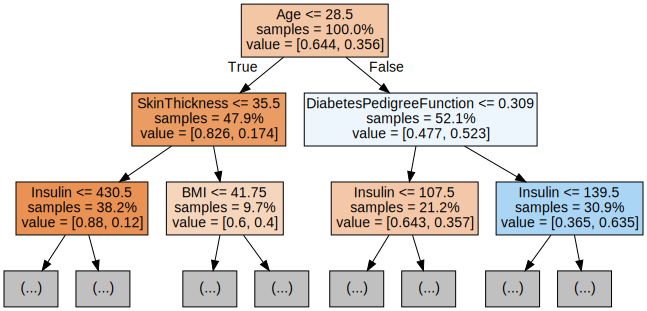

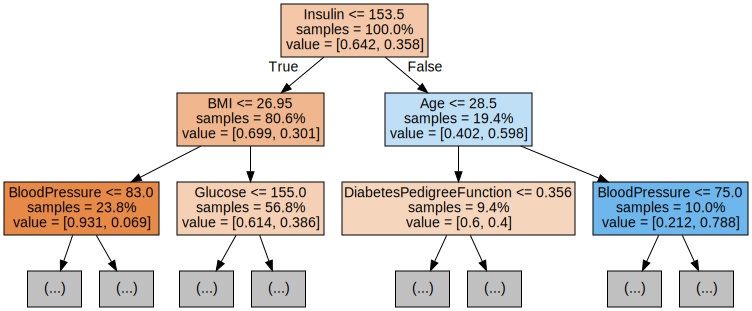

In [ ]:
# Export the first three decision trees from the forest
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree = classifier_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f45f95e7dc0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f45f95e6170>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 433}


# Evaluationary Measures:

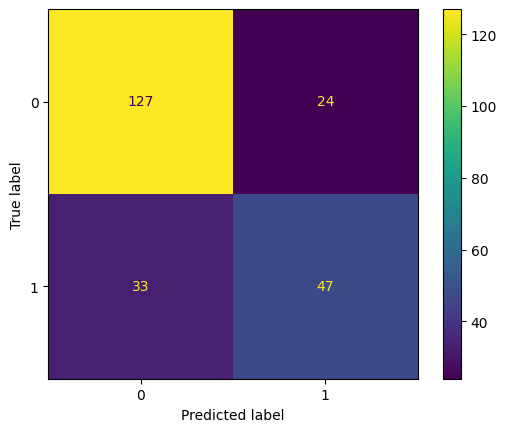

In [ ]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)


ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7532467532467533
Precision: 0.6619718309859155
Recall: 0.5875


# ROC-AUC CURVE

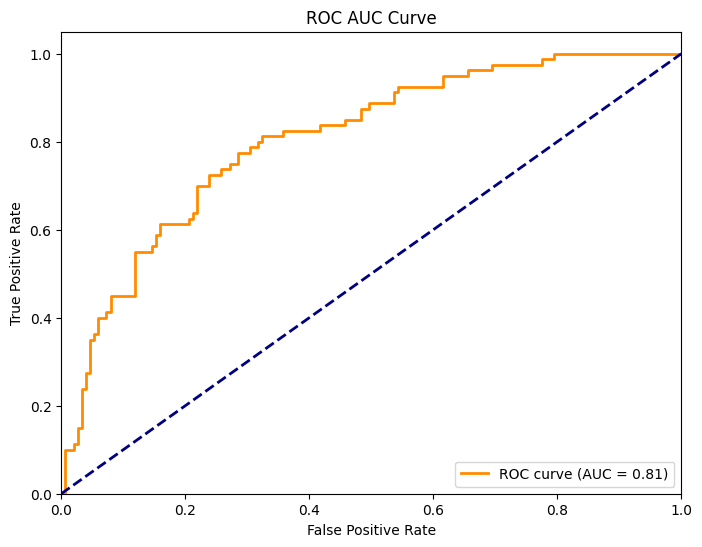

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = classifier_rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()


# Feature Importance

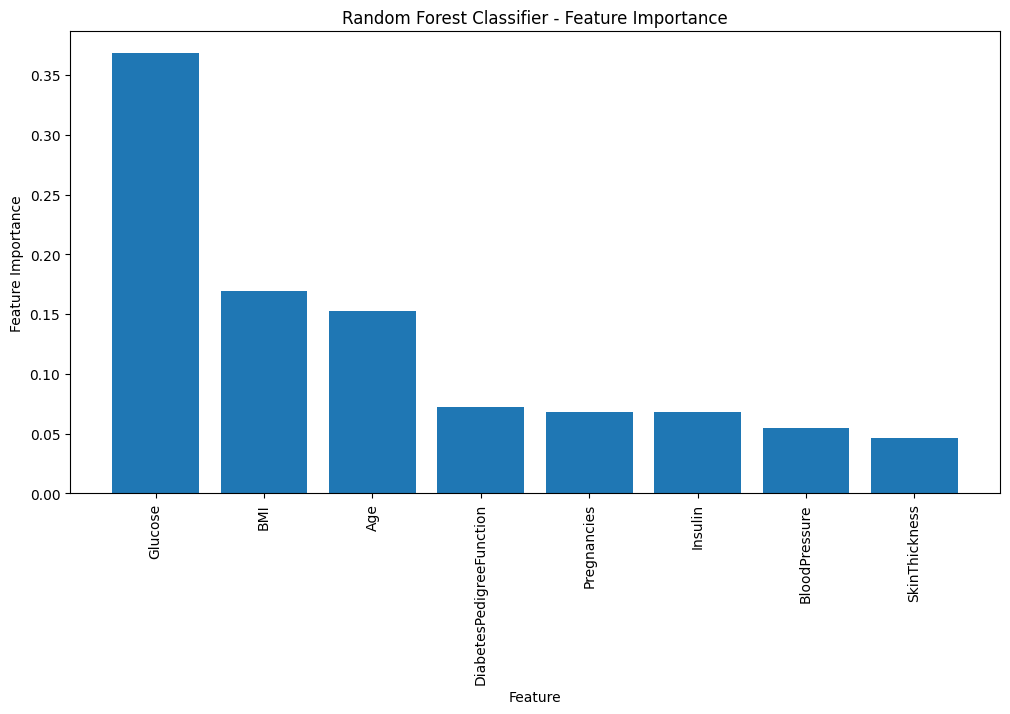

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained classifier
feature_importances = classifier_rf.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort the features by importance in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Create a bar chart to visualize feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()


# K-Fold Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 5-fold cross-Validation and calculate accuracy scores
scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f'Fold {fold}: Accuracy = {score:.4f}')

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy:.4f}')

Fold 1: Accuracy = 0.7013
Fold 2: Accuracy = 0.7922
Fold 3: Accuracy = 0.7403
Fold 4: Accuracy = 0.8571
Fold 5: Accuracy = 0.8182
Fold 6: Accuracy = 0.7273
Fold 7: Accuracy = 0.7922
Fold 8: Accuracy = 0.7403
Fold 9: Accuracy = 0.6711
Fold 10: Accuracy = 0.8289
Mean Accuracy: 0.7669


# 4. Random Forest using the other dataset

In [ ]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('diabetes_data.csv')
print(df.head())


   age gender  polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  \
0   40   Male         0           1                   0         1           0   
1   58   Male         0           0                   0         1           0   
2   41   Male         1           0                   0         1           1   
3   45   Male         0           0                   1         1           1   
4   60   Male         1           1                   1         1           1   

   genital_thrush  visual_blurring  itching  irritability  delayed_healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   
3               1                0        1             0                1   
4               0                1        1             1                1   

   partial_paresis  muscle_stiffness  alopec

In [ ]:
df.columns
df['gender'].replace({"Male":1,"Female":0},inplace=True)

df.head()


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
# Putting feature variable to X
X = df.drop('class',axis=1)
# Putting response variable to y
y = df['class']


In [ ]:

# now lets split the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape



((416, 16), (104, 16))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)
%time
classifier_rf.fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# checking the oob score
print(classifier_rf.oob_score_)


#Predicting the test set result
y_pred= classifier_rf.predict(X_test)
y_pred


0.9423076923076923


array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0])

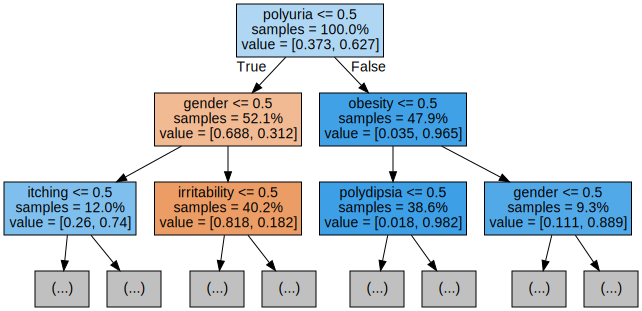

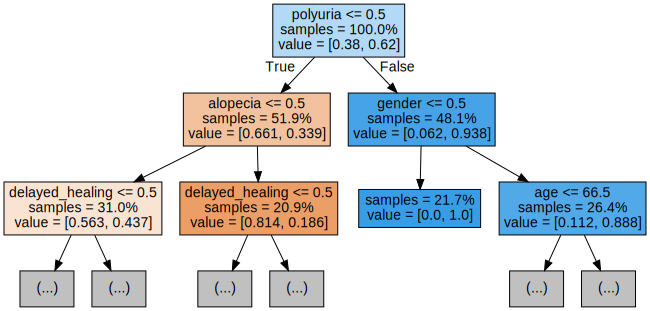

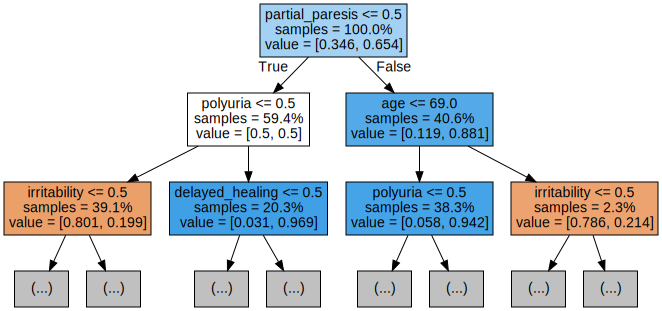

In [ ]:
# Export the first three decision trees from the forest
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree = classifier_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)



In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()


In [ ]:


# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f45fe0b9ba0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f45f8c91420>})

In [ ]:

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)


Best hyperparameters: {'max_depth': 14, 'n_estimators': 155}


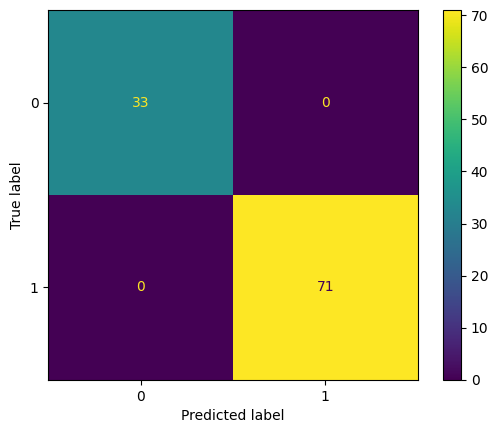

In [ ]:

#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)



ConfusionMatrixDisplay(confusion_matrix=cm).plot();


# Evaluationary Measures:

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [ ]:
class_counts = df['class'].value_counts()

# Print the counts
print(class_counts)

1    320
0    200
Name: class, dtype: int64


# probable reasons of 100% accuracy:
1. overfitting : number of attributes taken into consideration are too many
2. number of records: less
3. data imbalance: data of yes-diabetes is more than no-diabetes

# Feature Importance Plot

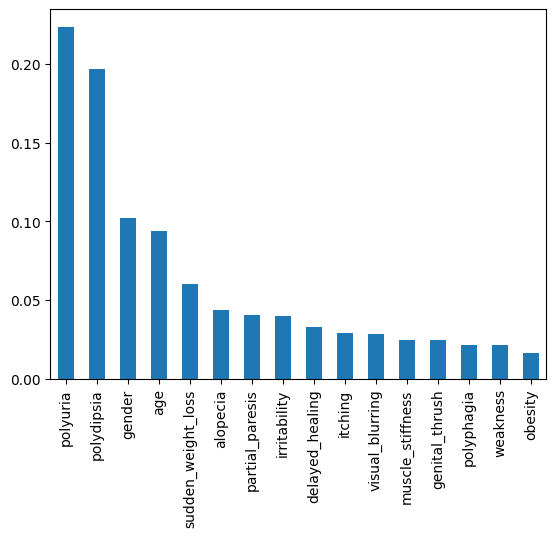

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

# ROC-AUC CURVE

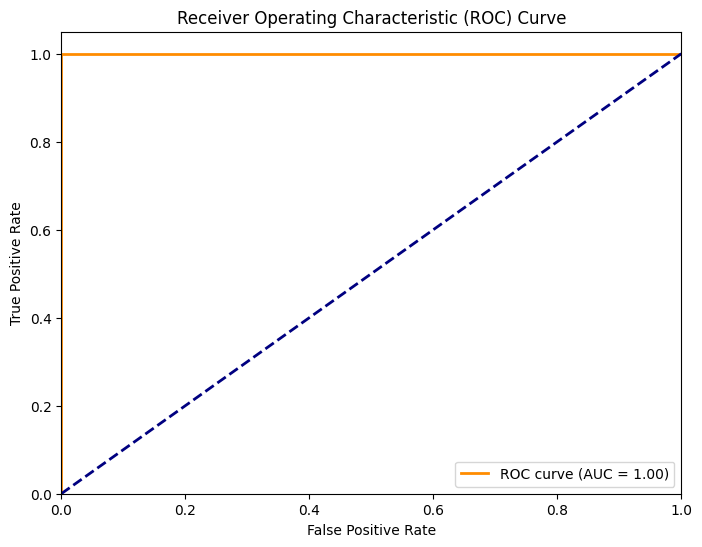

AUC: 1.0


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (positive class)
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print('AUC:', roc_auc)


# k-fold Validation

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Define the columns to encode (only 'gender' in this case)
categorical_cols = ['gender']

# Create a ColumnTransformer to apply one-hot encoding to the specified columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Pass through columns that don't require encoding
)

# Create a pipeline that includes the preprocessor and the RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True))
])

# Perform cross-Validation with the pipeline
scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f'Fold {fold}: Accuracy = {score:.4f}')

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy:.4f}')


Fold 1: Accuracy = 0.9423
Fold 2: Accuracy = 0.9615
Fold 3: Accuracy = 0.9615
Fold 4: Accuracy = 0.9231
Fold 5: Accuracy = 0.9808
Fold 6: Accuracy = 0.9231
Fold 7: Accuracy = 0.9615
Fold 8: Accuracy = 0.9231
Fold 9: Accuracy = 0.9423
Fold 10: Accuracy = 0.9808
Mean Accuracy: 0.9500




---



---



# 5. SVM using Pima Dataset

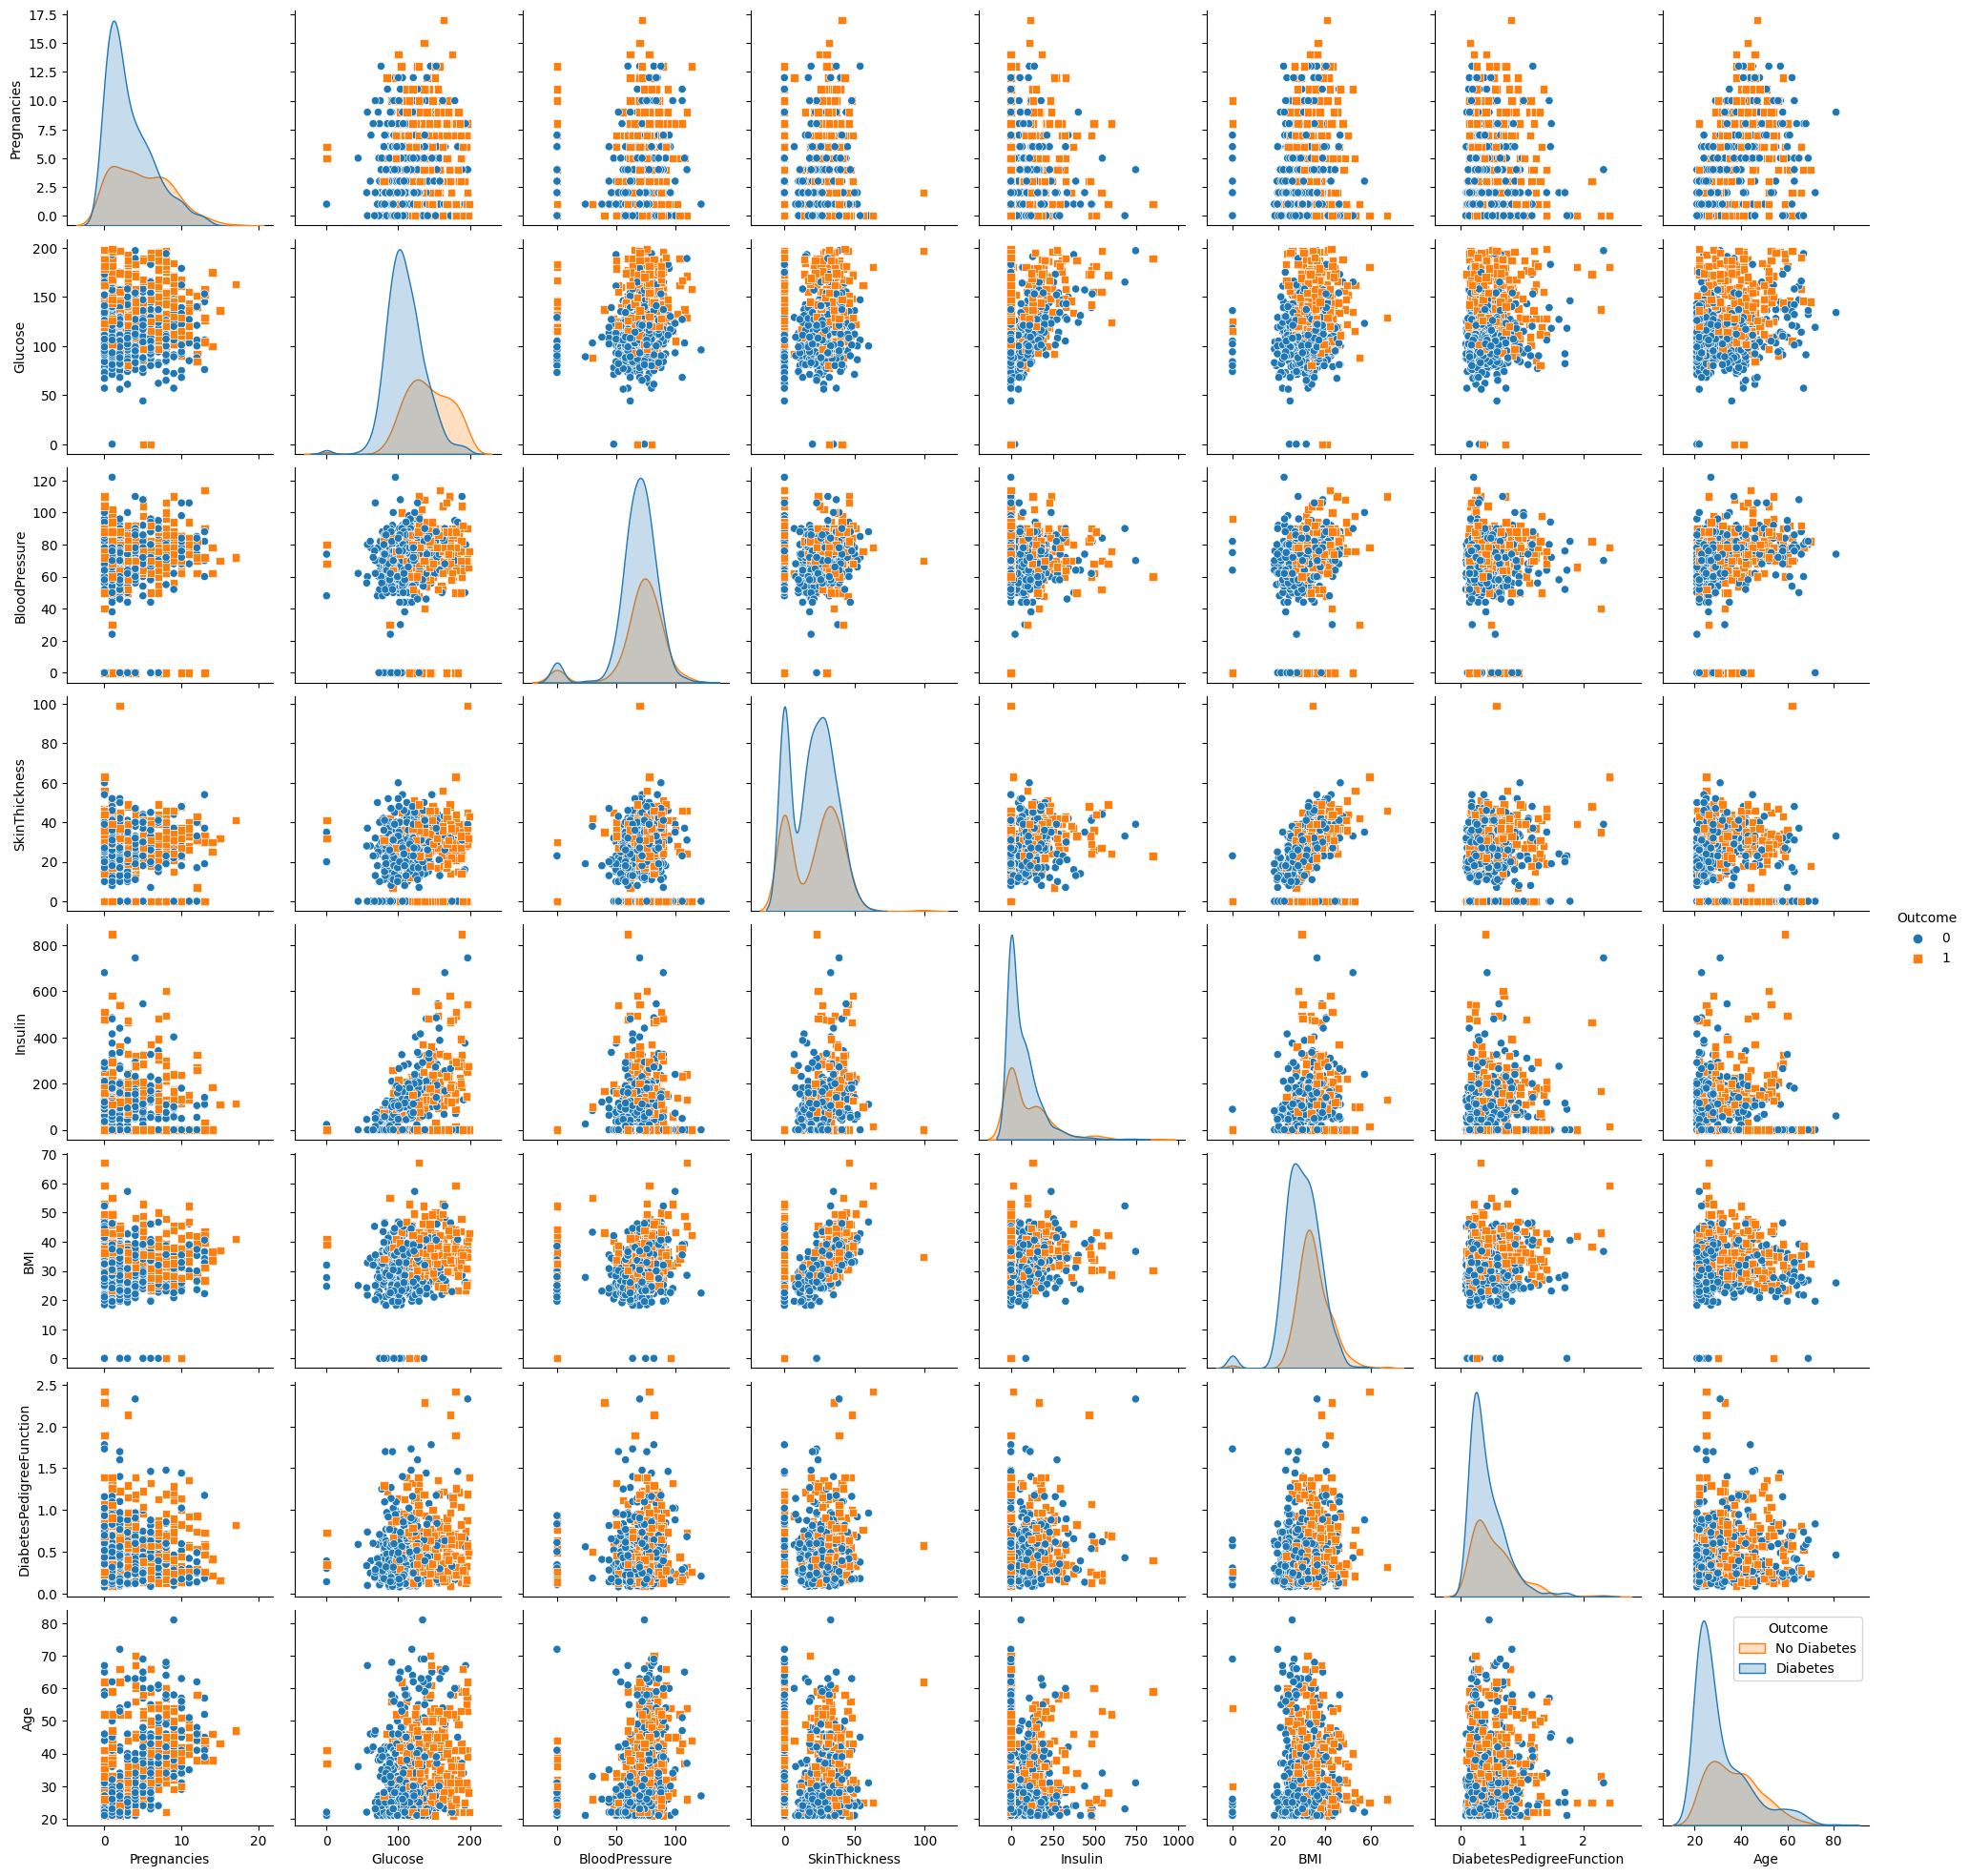

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('diabetes.csv')  # Replace with your dataset filename

# Select the features and target variable
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

# Create a pair plot to visualize feature relationships
sns.pairplot(df, hue=target, vars=features, diag_kind='kde', markers=["o", "s"])

# Add a legend
plt.legend(title='Outcome', loc='upper right', labels=['No Diabetes', 'Diabetes'])

# Show the plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check for missing values
# print(df.isnull().sum())

# Separate features and target variable
X = df.drop('Outcome', axis=1)
# X=df.iloc[:,[0,1,2,4,5,6,7]]
y = df['Outcome']

In [ ]:
from sklearn.decomposition import PCA

# Create a PCA instance and specify the number of components
pca = PCA(n_components=5)  # Adjust the number of components as needed
X = pca.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf')

# Train the model
svm_rbf.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_rbf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

# Evaluationary Measures:

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        99
           1       0.71      0.53      0.60        55

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



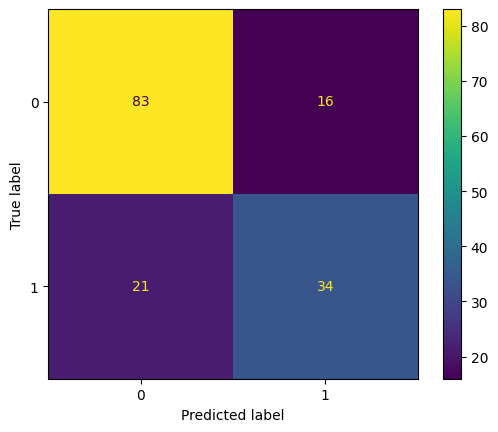

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=clf.classes_)
disp.plot()

# ROC-AUC CURVE

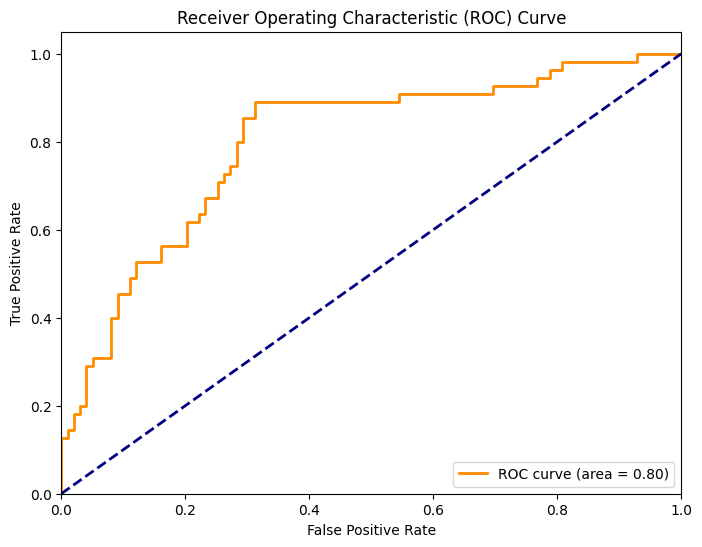

In [ ]:

# Compute ROC curve and ROC AUC
y_scores = svm_rbf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# FEATURE-IMPORTANCE PLOT:
SVM classifiers dont provide direct feature importances like RF or DT. SVM works by finding the hyperplane that best separates the classes in a high-dimensional space. Therefore, there's no straightforward way to determine feature importances from an SVM classifier.

It still can be found by using other methods like permutation feature importance or SHAP (SHapley Additive exPlanations)

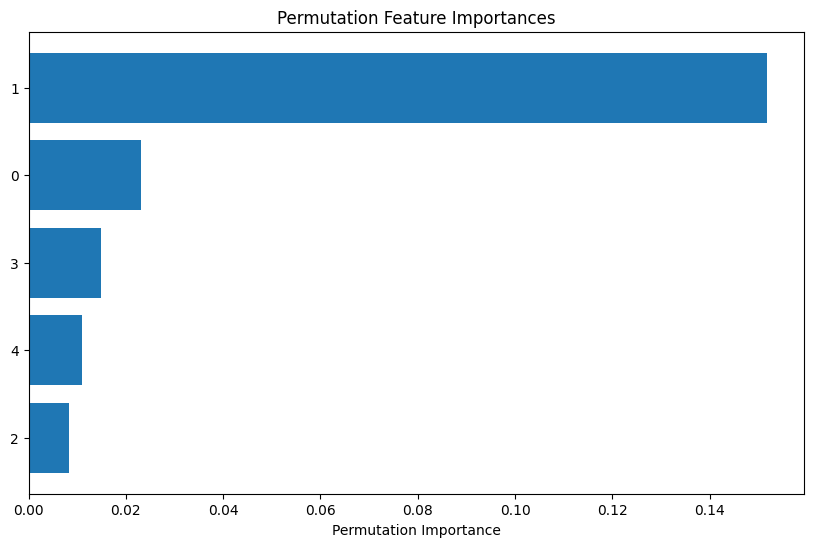

In [ ]:
import numpy as np
from sklearn.inspection import permutation_importance

# Calculate permutation feature importances
perm_importance = permutation_importance(svm_rbf, X_test, y_test, n_repeats=30, random_state=42)

# Sort the features by their importance scores
sorted_idx = perm_importance.importances_mean.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(X_test.shape[1]), sorted_idx)  # Use sorted feature indices as labels
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importances')
plt.show()


In [ ]:
# pip install -U imbalanced-learn

# K-fold Validation

In [ ]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# resampling_pipeline = Pipeline([
#     ('oversample', SMOTE(random_state=42)),
#     ('undersample', RandomUnderSampler(random_state=42)),
#     ('clf', clf)
# ])
# Perform 5-fold cross-Validation and calculate accuracy scores
scores = cross_val_score(svm_rbf, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f'Fold {fold}: Accuracy = {score:.4f}')

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy:.4f}')

Fold 1: Accuracy = 0.7532
Fold 2: Accuracy = 0.7532
Fold 3: Accuracy = 0.7143
Fold 4: Accuracy = 0.8052
Fold 5: Accuracy = 0.8052
Fold 6: Accuracy = 0.6494
Fold 7: Accuracy = 0.7922
Fold 8: Accuracy = 0.7662
Fold 9: Accuracy = 0.6974
Fold 10: Accuracy = 0.7763
Mean Accuracy: 0.7513


In [ ]:
predicted_labels = cross_val_predict(svm_rbf, X, y, cv=10)  # Specify the number of folds (e.g., cv=5 for 5-fold)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y, predicted_labels)

# Create a Pandas DataFrame for better visualization (optional)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Display the confusion matrix
print(conf_matrix_df)

          Predicted 0  Predicted 1
Actual 0          452           48
Actual 1          141          127


In [ ]:
class_distribution = df['Outcome'].value_counts()
print(class_distribution)

0    500
1    268
Name: Outcome, dtype: int64




---



---



# 6. SVM using the other Diabetes dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


df=pd.read_csv('diabetes_data.csv')
df.head()

# Check for missing values
# print(df.isnull().sum())
df['gender'].replace({"Male":1,"Female":0},inplace=True)
# Separate features and target variable
X = df.drop('class', axis=1)
# X=df.iloc[:,[0,1,2,4,5,6,7]]
y = df['class']

In [ ]:
from sklearn.decomposition import PCA
# Create a PCA instance and specify the number of components
pca = PCA(n_components=5)  # Adjust the number of components as needed
X = pca.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(df.columns)


Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')


In [ ]:
df['gender'].replace({"Male":1,"Female":0},inplace=True)

In [ ]:
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC()

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1
 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0]


# Evaluationary Measures:

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.93      0.89      0.91        71

    accuracy                           0.88       104
   macro avg       0.85      0.87      0.86       104
weighted avg       0.88      0.88      0.88       104



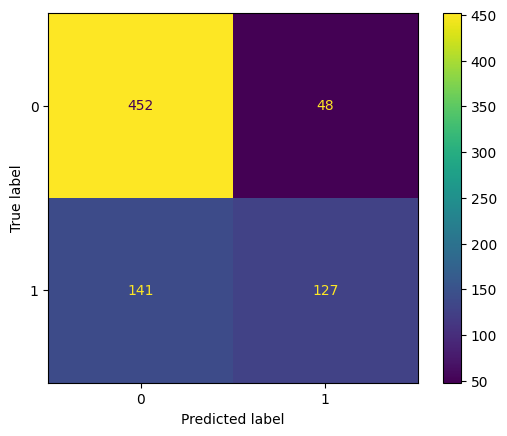

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=clf.classes_)
disp.plot()

# ROC-AUC CURVE:

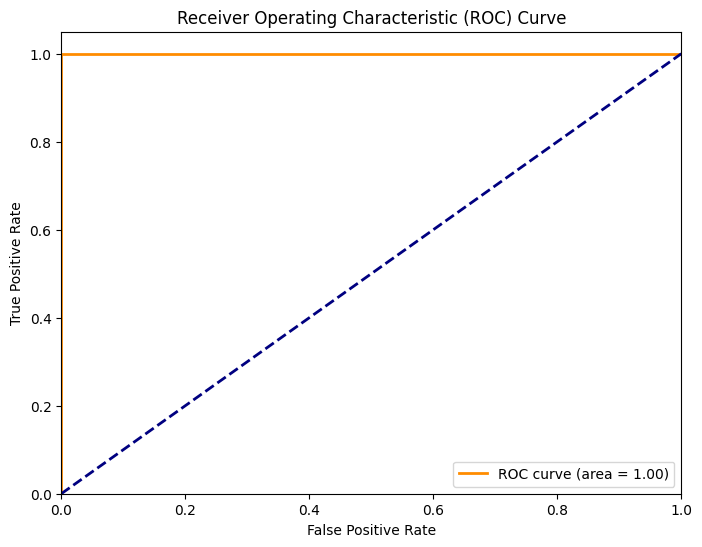

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Feature-Importance plot

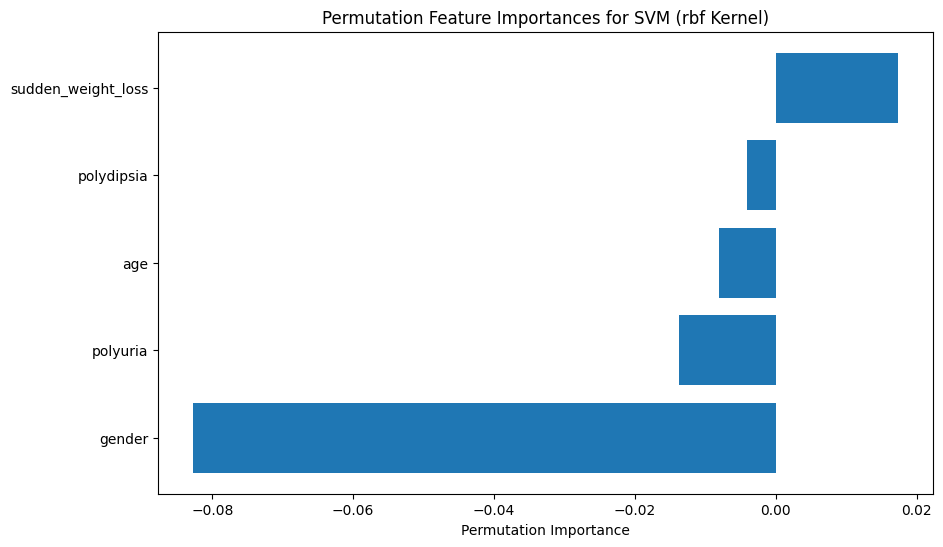

In [ ]:
perm_importance = permutation_importance(svm_rbf, X_test, y_test, n_repeats=30, random_state=42)

# Get feature importances and their indices
feature_importances = perm_importance.importances_mean
feature_indices = np.argsort(feature_importances)

# Use original feature names
feature_names = df.drop('class', axis=1).columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X_test.shape[1]), feature_importances[feature_indices], align='center')
plt.yticks(range(X_test.shape[1]), feature_names[feature_indices])
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importances for SVM (rbf Kernel)')
plt.show()

# K-fold Validation

In [ ]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# resampling_pipeline = Pipeline([
#     ('oversample', SMOTE(random_state=42)),
#     ('undersample', RandomUnderSampler(random_state=42)),
#     ('clf', clf)
# ])
# Perform 5-fold cross-Validation and calculate accuracy scores
scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f'Fold {fold}: Accuracy = {score:.4f}')

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy:.4f}')

Fold 1: Accuracy = 0.8462
Fold 2: Accuracy = 0.8654
Fold 3: Accuracy = 0.8846
Fold 4: Accuracy = 0.8654
Fold 5: Accuracy = 0.8269
Fold 6: Accuracy = 0.8462
Fold 7: Accuracy = 0.8077
Fold 8: Accuracy = 0.8462
Fold 9: Accuracy = 0.8462
Fold 10: Accuracy = 0.8462
Mean Accuracy: 0.8481


In [ ]:
predicted_labels = cross_val_predict(clf, X, y, cv=10)  # Specify the number of folds (e.g., cv=5 for 5-fold)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y, predicted_labels)

# Create a Pandas DataFrame for better visualization (optional)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Display the confusion matrix
print(conf_matrix_df)

          Predicted 0  Predicted 1
Actual 0          167           33
Actual 1           48          272


In [ ]:
class_distribution = df['class'].value_counts()
print(class_distribution)
# for diabetes_data....

1    320
0    200
Name: class, dtype: int64


# **XGBOOST2**



Each new weak learner is trained to minimize these residuals, loss function calculated using MSE

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error,confusion_matrix,ConfusionMatrixDisplay
import pandas as pd

In [ ]:
df=pd.read_csv('diabetes_data.csv')
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
# Check for missing values
print(df.isnull().sum())


df['gender'].replace({"Male":1,"Female":0},inplace=True)

X = df.drop('class', axis=1)
y = df['class']

df.head()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
434,53,1,1,1,1,1,1,0,1,0,1,0,1,0,1,0
436,41,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1
208,54,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0
332,50,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0
220,38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,35,0,0,1,1,1,0,0,0,1,0,1,1,1,0,0
106,58,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1
270,40,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0
435,57,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0


In [ ]:
# Example for a classification problem
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)
import numpy as np

# Example for classification
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Example for regression
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.9903846153846154
RMSE: 0.09805806756909202
Confusion Matrix:
 [[33  0]
 [ 1 70]]


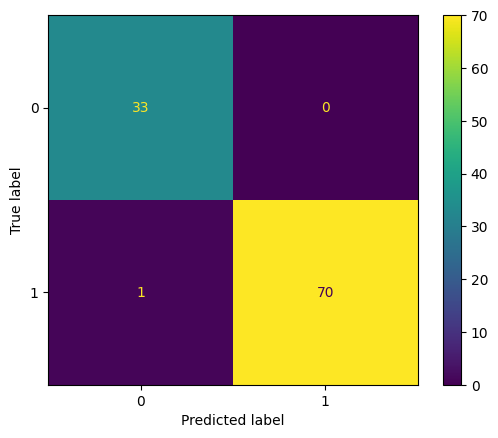

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=model.classes_)
disp.plot()
# plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
kf = KFold(n_splits=10, shuffle=True, random_state=42)


# Perform 5-fold cross-validation and calculate accuracy scores
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f'Fold {fold}: Accuracy = {score:.4f}')

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy:.4f}')

Fold 1: Accuracy = 1.0000
Fold 2: Accuracy = 0.9808
Fold 3: Accuracy = 0.9808
Fold 4: Accuracy = 0.9231
Fold 5: Accuracy = 0.9615
Fold 6: Accuracy = 0.9423
Fold 7: Accuracy = 0.9615
Fold 8: Accuracy = 0.9615
Fold 9: Accuracy = 0.9808
Fold 10: Accuracy = 1.0000
Mean Accuracy: 0.9692


# **XGBOOST2**

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error,confusion_matrix,ConfusionMatrixDisplay
import pandas as pd

In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check for missing values
print(df.isnull().sum())

X = df.drop('Outcome', axis=1)
y = df['Outcome']

df.head()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [ ]:
# Example for a classification problem
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Example for a classification problem
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)
# Example for classification
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Example for regression
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.7337662337662337
RMSE: 0.515978455203089
Confusion Matrix:
 [[76 23]
 [18 37]]


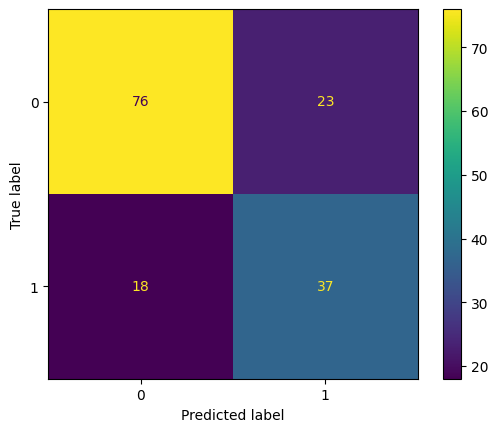

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=model.classes_)
disp.plot()
# plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Perform 5-fold cross-validation and calculate accuracy scores
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f'Fold {fold}: Accuracy = {score:.4f}')

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy:.4f}')

Fold 1: Accuracy = 0.7338
Fold 2: Accuracy = 0.8052
Fold 3: Accuracy = 0.7727
Fold 4: Accuracy = 0.7516
Fold 5: Accuracy = 0.7582
Mean Accuracy: 0.7643


# **adaboost1**



AdaBoost assigns weights to each training example. Initially, all examples have equal weights. After each iteration, the weights of the misclassified examples are increased, while the weights of correctly classified examples are decreased. This focuses the attention of the algorithm on the examples that are difficult to classify.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report
import numpy as np

import pandas as pd
data = pd.read_csv('diabetes.csv')
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target variable
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Create a weak learner (Decision Tree Classifier)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost Classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


Accuracy: 0.7445887445887446
Precision: 0.6329113924050633
Recall: 0.625
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 5-fold cross-validation and calculate accuracy scores
scores = cross_val_score(adaboost_classifier, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f'Fold {fold}: Accuracy = {score:.4f}')

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Fold 1: Accuracy = 0.7532
Fold 2: Accuracy = 0.7792
Fold 3: Accuracy = 0.7143
Fold 4: Accuracy = 0.7662
Fold 5: Accuracy = 0.8052
Fold 6: Accuracy = 0.7013
Fold 7: Accuracy = 0.8052
Fold 8: Accuracy = 0.7403
Fold 9: Accuracy = 0.6711
Fold 10: Accuracy = 0.8421
Mean Accuracy: 0.7578


# **LIME FOR RF**

# **SHAP FOR RF**

#**OCR..EXTRACTING VALUES FROM PATHOLOGY REPORTS COLLECTED**



---



---

